<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df = pd.set_option('display.float_format', '{:,.2f}'.format)
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# Получим общие свединия о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


### Вывод

Датасет имеет 22 столбца и 23699 строк. Есть строки с пропусками. Некоторые столбцы имеют неверный тип.


## Предобработка данных

In [3]:
# Проверим на дубликаты
df.duplicated().sum()

0

In [4]:
# Выведем пропуски в датасете
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В датасете довольно много пропусков, скорей всего данные не были внесены при подачи обьявления.
Заменим пропуски на 0, в стоблце locality_name на unknow для сохранения других данных. Также для большей читаемости изменим тип в столбцах.
В столбце "дата публикации" привести к типу datetime.

In [5]:
median_ceiling_height = df['ceiling_height'].median()
df['ceiling_height'].fillna(median_ceiling_height, inplace=True)
df['last_price'] = df['last_price'].astype('int')
df['total_area'] = df['total_area'].astype('int')
df['living_area'] = df['living_area'].fillna(df['total_area']*0.5).astype('int')
df['is_apartment'] = df['is_apartment'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area']*0.2).astype('int')
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['locality_name'].fillna('unknow', inplace=True)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.00,51,8,0,...,25,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,1,0,...,11,2,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,4,0,...,8,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,64900000,159,2015-07-24,3,2.65,14.00,79,9,0,...,31,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,10000000,100,2018-06-19,2,3.03,14.00,32,13,0,...,41,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,5,0,...,9,0,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,6,0,...,14,1,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,22,0,...,18,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,2900000,33,2018-05-23,1,2.65,27.00,15,26,0,...,8,0,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,5400000,61,2017-02-26,3,2.50,9.00,43,7,0,...,6,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


Заменили в столбце 'days_exposition' пропуски на медианное значение, остальные пропуски на 0, чтобы сохранить всю информацию, т.к. требования покупателей очень сильно отличаются. Расстояние до обьектов, площадь кухни и жилую округлили до целых значений.

Дубликаты отсутствуют.

Получили хорошо читаемую таблицу без пропусков.

## Расчёты и добавление результатов в таблицу

Расчет цены за квадратный метр.

In [6]:
# перевели в тыс. руб. за м2.
df['price_per_square_metr'] = df['last_price'] / df['total_area']
df['price_per_square_metr'] = (df[df['price_per_square_metr'].notnull()]['price_per_square_metr']/1000*1.0).round(3)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr
0,20,13000000,108,2019-03-07,3,2.70,16.00,51,8,0,...,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,120.37
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,1,0,...,2,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00,83.75
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,4,0,...,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,92.79
3,0,64900000,159,2015-07-24,3,2.65,14.00,79,9,0,...,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,408.18
4,2,10000000,100,2018-06-19,2,3.03,14.00,32,13,0,...,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,100.00
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,5,0,...,0,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00,96.33
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,6,0,...,1,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00,100.00
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,22,0,...,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan,111.48
8,20,2900000,33,2018-05-23,1,2.65,27.00,15,26,0,...,0,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00,87.88
9,18,5400000,61,2017-02-26,3,2.50,9.00,43,7,0,...,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00,88.53


Создадим столбцы неделя, месяц, год.

In [7]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.00,51,8,0,...,"16,028.00",1.00,482.00,2.00,755.00,nan,120.37,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,1,0,...,"18,603.00",0.00,nan,0.00,nan,81.00,83.75,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,4,0,...,"13,933.00",1.00,90.00,2.00,574.00,558.00,92.79,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14.00,79,9,0,...,"6,800.00",2.00,84.00,3.00,234.00,424.00,408.18,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14.00,32,13,0,...,"8,098.00",2.00,112.00,1.00,48.00,121.00,100.00,1,6,2018
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,5,0,...,nan,nan,nan,nan,nan,55.00,96.33,0,9,2018
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,6,0,...,"19,143.00",0.00,nan,0.00,nan,155.00,100.00,3,11,2017
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,22,0,...,"11,634.00",0.00,nan,0.00,nan,nan,111.48,3,4,2019
8,20,2900000,33,2018-05-23,1,2.65,27.00,15,26,0,...,nan,nan,nan,nan,nan,189.00,87.88,2,5,2018
9,18,5400000,61,2017-02-26,3,2.50,9.00,43,7,0,...,"15,008.00",0.00,nan,0.00,nan,289.00,88.53,6,2,2017


Разделим этажи на группы.

In [8]:
# Функция сравнения значений столбца 'floor' со стьолбцом 'floors_total'
def floor_grouped(floor):
    floor_first = floor['floor']
    floor_last = floor['floors_total']
    if floor_first == 1: return 'первый'
    elif floor_last == floor_first: return 'последний'
    return 'другой'

In [9]:
# замена значений в столбце 'floor'
floor_grouped = df.apply(floor_grouped, axis=1)
df['floor'] = floor_grouped
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108,2019-03-07,3,2.70,16.00,51,другой,0,...,"16,028.00",1.00,482.00,2.00,755.00,nan,120.37,3,3,2019
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,первый,0,...,"18,603.00",0.00,nan,0.00,nan,81.00,83.75,1,12,2018
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,другой,0,...,"13,933.00",1.00,90.00,2.00,574.00,558.00,92.79,3,8,2015
3,0,64900000,159,2015-07-24,3,2.65,14.00,79,другой,0,...,"6,800.00",2.00,84.00,3.00,234.00,424.00,408.18,4,7,2015
4,2,10000000,100,2018-06-19,2,3.03,14.00,32,другой,0,...,"8,098.00",2.00,112.00,1.00,48.00,121.00,100.00,1,6,2018
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,другой,0,...,nan,nan,nan,nan,nan,55.00,96.33,0,9,2018
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,другой,0,...,"19,143.00",0.00,nan,0.00,nan,155.00,100.00,3,11,2017
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,другой,0,...,"11,634.00",0.00,nan,0.00,nan,nan,111.48,3,4,2019
8,20,2900000,33,2018-05-23,1,2.65,27.00,15,другой,0,...,nan,nan,nan,nan,nan,189.00,87.88,2,5,2018
9,18,5400000,61,2017-02-26,3,2.50,9.00,43,другой,0,...,"15,008.00",0.00,nan,0.00,nan,289.00,88.53,6,2,2017


Расчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [10]:
df['living_area/total_area'] = df['living_area'] / df['total_area']
df['kitchen_area/total_area'] =df['kitchen_area'] / df['total_area']
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area
0,20,13000000,108,2019-03-07,3,2.70,16.00,51,другой,0,...,482.00,2.00,755.00,nan,120.37,3,3,2019,0.47,0.23
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,первый,0,...,nan,0.00,nan,81.00,83.75,1,12,2018,0.45,0.28
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,другой,0,...,90.00,2.00,574.00,558.00,92.79,3,8,2015,0.61,0.14
3,0,64900000,159,2015-07-24,3,2.65,14.00,79,другой,0,...,84.00,3.00,234.00,424.00,408.18,4,7,2015,0.50,0.19
4,2,10000000,100,2018-06-19,2,3.03,14.00,32,другой,0,...,112.00,1.00,48.00,121.00,100.00,1,6,2018,0.32,0.41
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,другой,0,...,nan,nan,nan,55.00,96.33,0,9,2018,0.47,0.30
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,другой,0,...,nan,0.00,nan,155.00,100.00,3,11,2017,0.27,0.38
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,другой,0,...,nan,0.00,nan,nan,111.48,3,4,2019,0.49,0.25
8,20,2900000,33,2018-05-23,1,2.65,27.00,15,другой,0,...,nan,nan,nan,189.00,87.88,2,5,2018,0.45,0.24
9,18,5400000,61,2017-02-26,3,2.50,9.00,43,другой,0,...,nan,0.00,nan,289.00,88.53,6,2,2017,0.70,0.10


## Исследовательский анализ данных

In [11]:
# импорт библиотеки для построения графиков
import matplotlib.pyplot as plt

<div class="alert alert-info"><b>Комментарий студента:</b> 
    
- Подписал оси.
       
</div>

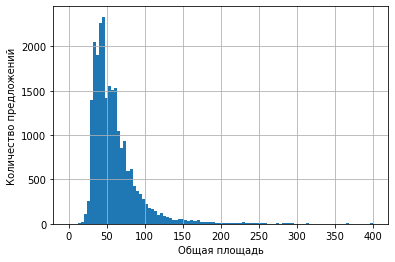

In [12]:
# гистограмма площади
plt.xlabel('Общая площадь')
plt.ylabel('Количество предложений')
df['total_area'].hist(bins=100, range=(0, 400))

Вывод: больше всего предложений с площадью квартиры в диапазоне 40-50 кв. м.

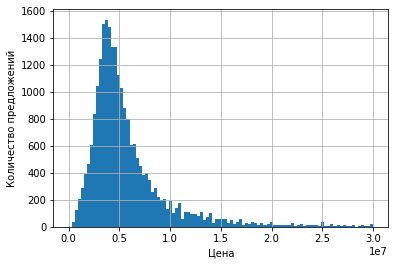

In [13]:
# гистограмма цены
plt.xlabel('Цена')
plt.ylabel('Количество предложений')
df['last_price'].hist(bins=100, range=(0, 30000000))

Вывод: максимальное количество предложений в ценновом диапазоне 3-4 млн. руб.

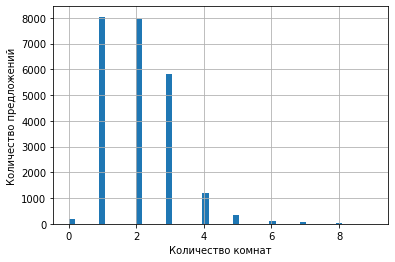

In [14]:
# гистограмма количество комнат
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
df['rooms'].hist(bins=50, range=(0, 9))

Вывод: в основном продают 1-2 квартиры, но на 3-х комнатные квартиры тоже довольно много предложений.

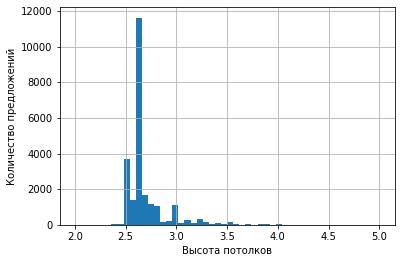

In [15]:
# гистограмма высоты потолков
plt.xlabel('Высота потолков')
plt.ylabel('Количество предложений')
df['ceiling_height'].hist(bins=50, range=(2, 5))

Вывод: средняя высота потолков 2,6 м.

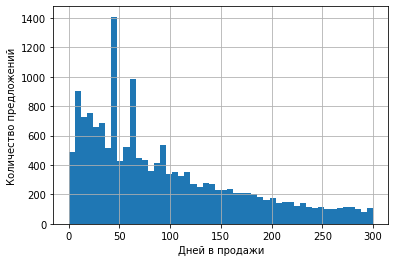

In [16]:
# гистограмма количество дней продажи
plt.xlabel('Дней в продажи')
plt.ylabel('Количество предложений')
df['days_exposition'].hist(bins=50, range=(0, 300))

Вывод: больше всего продаж в течение 45 дней.

In [17]:
# Выведим среднее по столбцу 'days_exposition'
df['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

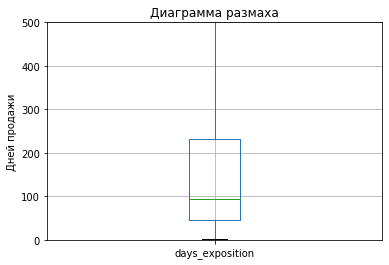

In [18]:
# диаграмма 
plt.title('Диаграмма размаха')
plt.ylim(0, 500)
plt.ylabel('Дней продажи')
df.boxplot(column='days_exposition')
plt.show()

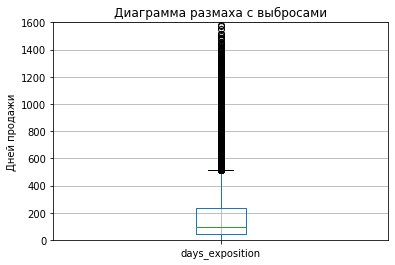

In [19]:
# диаграмма со всеми выбросами
plt.title('Диаграмма размаха с выбросами')
plt.ylabel('Дней продажи')
plt.ylim(0, 1600)
df.boxplot(column='days_exposition')
plt.show()

Исследуя гистограммы и диаграмму размаха, можно сделать выводы, чаще всего продают стандартные 1-2 комнатнные квартиры площадью 40-50 кв. м., срок продажи около 95 дней. Самые быстрые продажи в 1 день, самые долгие 430 дней, так же есть продажи более 1000 дней, скорей всего это либо самые дорогие квартиры, либо обьявления не снятые с продажи.

count   19,916.00
mean       184.43
std        222.06
min          1.00
25%         44.00
50%        100.00
75%        239.00
max      1,580.00
Name: days_exposition, dtype: float64

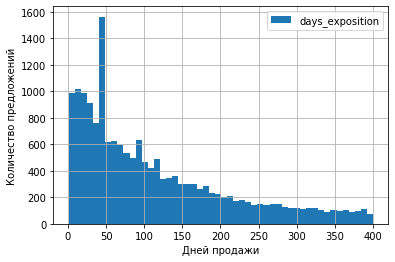

In [20]:
# Уберем выбросы
filtered_df = df.query('days_exposition < 430')
filtered_df = df.query('days_exposition != 95 and days_exposition != 60 and days_exposition != 45')                      
filtered_df.plot(y='days_exposition', kind = 'hist', grid=True, bins=50, range=(1, 400))   
plt.xlabel('Дней продажи')
plt.ylabel('Количество предложений')
filtered_df['days_exposition'].describe() 

Вывод: после очистки от выбросов, получили 4 пика 95,70, 50, 10 дней, данные выглядят нормально.

In [21]:
# Выведим среднее по столбцу 'last_price'
filtered_df['last_price'].describe()

count        23,097.00
mean      6,555,491.36
std      11,022,932.37
min          12,190.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,770,000.00
max     763,000,000.00
Name: last_price, dtype: float64

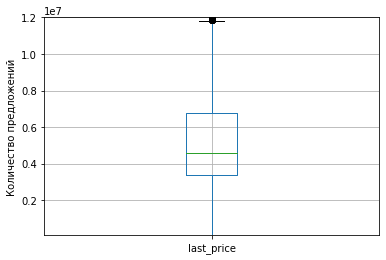

In [22]:
# построим диаграмму
plt.ylabel('Количество предложений')
plt.ylim(100000, 12000000)
filtered_df.boxplot(column='last_price')
plt.show()

На диаграмме выбросы это квартиры стоимостью свыше 9,5 млн. руб. 

Вывод: отсечем квартиры стоимостью свыше 9,5 млн. руб. и 1.0 млн. руб., т.к. их доля мала. 

In [23]:
# Удалим выбросы стоимости квартир
filtered_df = filtered_df.query('1000000 < last_price < 9500000')
df.query('last_price > 9500000').count()


total_images               3027
last_price                 3027
total_area                 3027
first_day_exposition       3027
rooms                      3027
ceiling_height             3027
floors_total               3010
living_area                3027
floor                      3027
is_apartment               3027
studio                     3027
open_plan                  3027
kitchen_area               3027
balcony                    3027
locality_name              3027
airports_nearest           2969
cityCenters_nearest        2980
parks_around3000           2981
parks_nearest              1879
ponds_around3000           2981
ponds_nearest              1920
days_exposition            2297
price_per_square_metr      3027
weekday_exposition         3027
month_exposition           3027
year_exposition            3027
living_area/total_area     3027
kitchen_area/total_area    3027
dtype: int64

In [24]:
df.query('last_price < 1000000').count()

total_images               225
last_price                 225
total_area                 225
first_day_exposition       225
rooms                      225
ceiling_height             225
floors_total               225
living_area                225
floor                      225
is_apartment               225
studio                     225
open_plan                  225
kitchen_area               225
balcony                    225
locality_name              225
airports_nearest             1
cityCenters_nearest          1
parks_around3000             1
parks_nearest                1
ponds_around3000             1
ponds_nearest                0
days_exposition            180
price_per_square_metr      225
weekday_exposition         225
month_exposition           225
year_exposition            225
living_area/total_area     225
kitchen_area/total_area    225
dtype: int64

Рассмотрим, зависит ли цена от площади квартиры

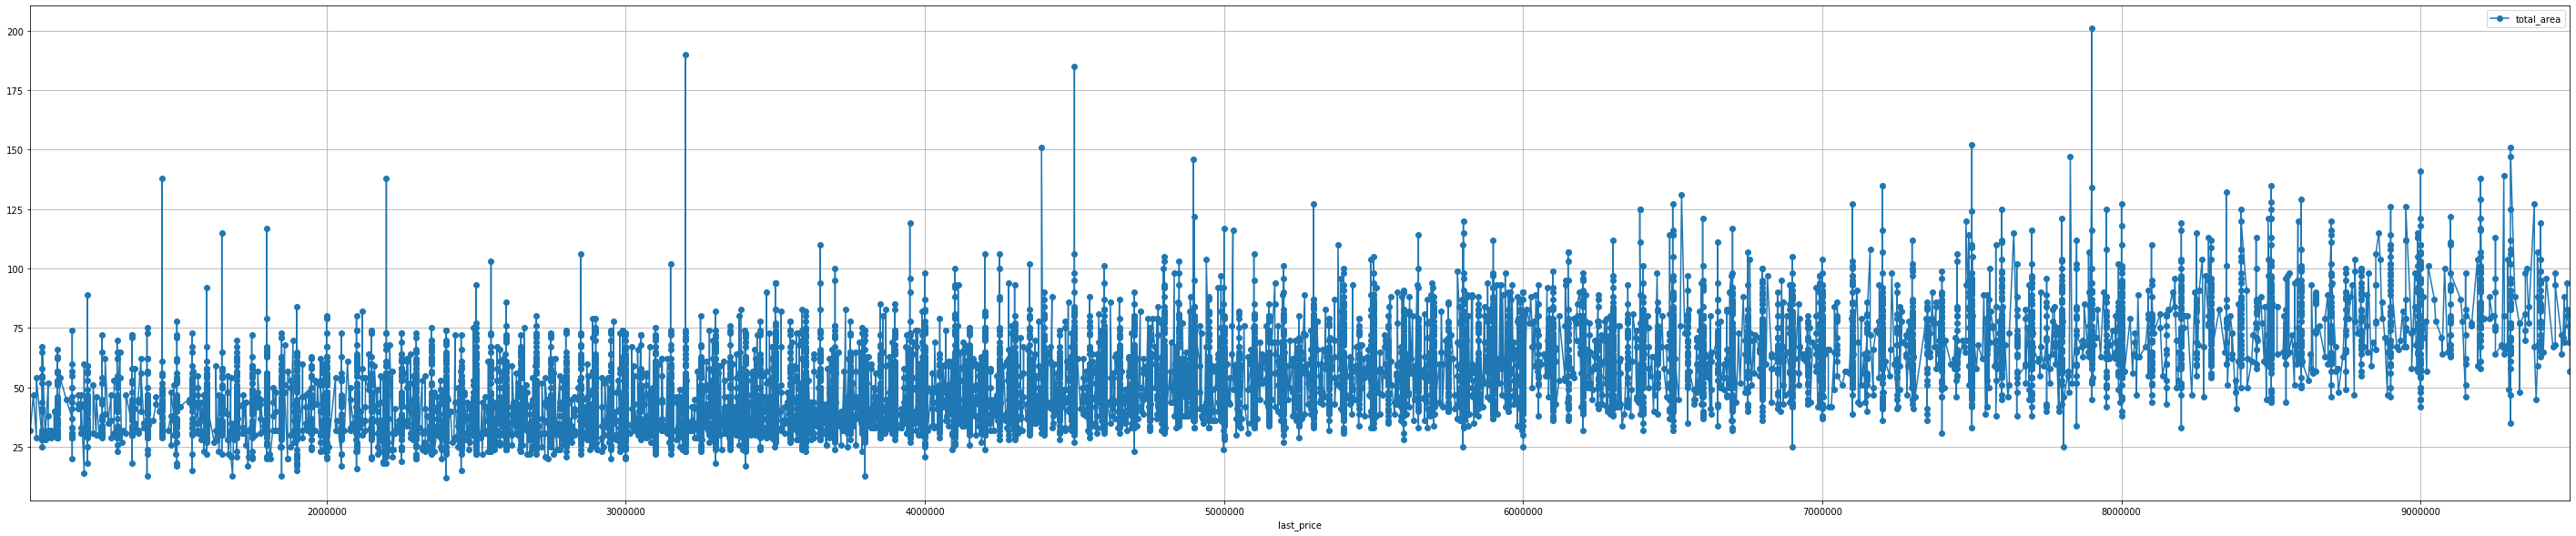

In [25]:
(filtered_df
     .sort_values('last_price', ascending=True)
     .plot(x='last_price', y='total_area', legend=True, grid=True, style='o-', figsize=(50, 10))
)

In [26]:
# Проверим корреляцию
filtered_df['last_price'].corr(filtered_df['total_area'])

0.6407248669377861

Коэффициент Пирсона 0,65 значит зависимость цены от площади есть. При увиличение площади возростает и цена.

Рассмотрим, зависитли цена от числа комнат.

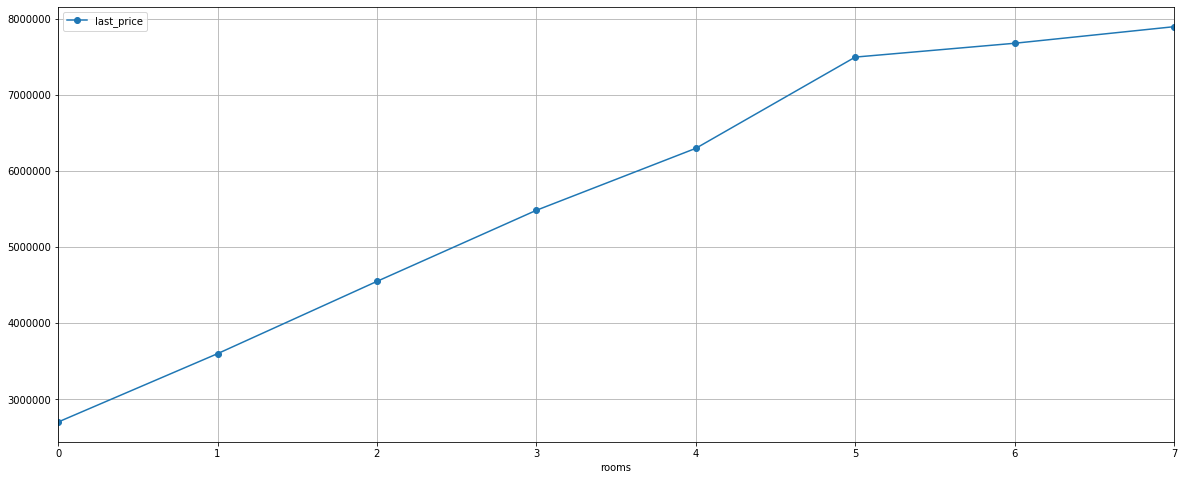

In [27]:
(filtered_df
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms', y='last_price', legend=True, grid=True, style='o-', figsize=(20, 8), alpha=1)
)

In [28]:
# Проверим корреляцию
filtered_df['rooms'].corr(filtered_df['last_price'])

0.4201896332166553

Коэффициент положительный, значит зависимость есть. Чем больше комнат, тем больше площадь, соответсвенно и цена.

Рассмотрим, зависимость цены от удалённости от центра.

Text(0, 0.5, 'Стоимость квартиры')

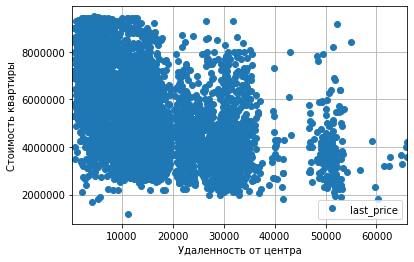

In [29]:
(filtered_df
     .groupby('cityCenters_nearest')['last_price'].median()
     .plot(x='cityCenters_nearest', y='last_price', legend=True, grid=True, style='o', alpha=1)
)
plt.xlabel('Удаленность от центра')
plt.ylabel('Стоимость квартиры')

In [30]:
# Проверим корреляцию
filtered_df['cityCenters_nearest'].corr(filtered_df['last_price'])

-0.3247053515100974

Вывод: Кэффициент отрицательный и  близко к 0, зависимость слабая.

Рассмотрим зависимость цены от того, на каком этаже расположена квартира.

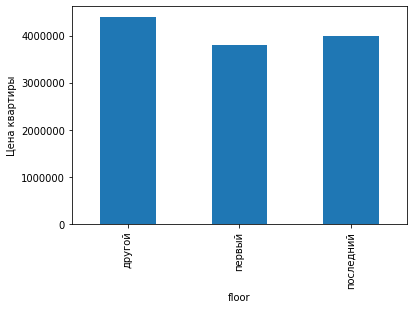

In [31]:
plt.ylabel('Цена квартиры')
(filtered_df
     .groupby('floor')['last_price'].median()
     .plot(x='floor', y='last_price', kind='bar')
)

Вывод: цена не сильно зависит от этажа.

In [32]:
top_sale = (filtered_df
             .pivot_table(index='locality_name', values='price_per_square_metr', aggfunc=('count', 'median'))
             .sort_values('count', ascending=False)
)
top_sale.head(10)

,count,median
locality_name,,
Санкт-Петербург,12308,101.28
посёлок Мурино,509,86.35
посёлок Шушары,425,76.74
Всеволожск,382,65.71
Колпино,326,75.00
Пушкин,318,98.46
посёлок Парголово,314,92.25
Гатчина,294,67.69
деревня Кудрово,283,92.31


Вывод: подавляющие число обьявлений, как и стоимость за кв. метр в Санкт-Петербурге. Что логично, т.к. большой город с дорогой недвижимостью. Самые дешевые квартиры в Выборге.

In [33]:
# Округлим расстояние до центр до километров
filtered_df['cityCenters_nearest_km'] = filtered_df['cityCenters_nearest'] / 1000
filtered_df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_km
1,7,3350000,40,2018-12-04,1,2.65,11.00,18,первый,0,...,0.00,nan,81.00,83.75,1,12,2018,0.45,0.28,18.60
2,10,5196000,56,2015-08-20,2,2.65,5.00,34,другой,0,...,2.00,574.00,558.00,92.79,3,8,2015,0.61,0.14,13.93
5,10,2890000,30,2018-09-10,1,2.65,12.00,14,другой,0,...,nan,nan,55.00,96.33,0,9,2018,0.47,0.30,nan
6,6,3700000,37,2017-11-02,1,2.65,26.00,10,другой,0,...,0.00,nan,155.00,100.00,3,11,2017,0.27,0.38,19.14
7,5,7915000,71,2019-04-18,2,2.65,24.00,35,другой,0,...,0.00,nan,nan,111.48,3,4,2019,0.49,0.25,11.63


Text(0, 0.5, 'Цена квартиры')

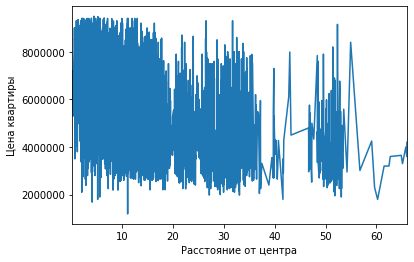

In [34]:
filtered_df.groupby('cityCenters_nearest_km')['last_price'].mean().plot()
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена квартиры')

Text(0, 0.5, 'Цена квартиры')

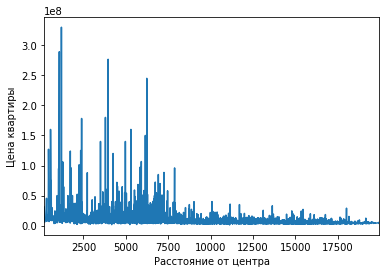

In [35]:
(df.query('cityCenters_nearest < 20000')
     .groupby('cityCenters_nearest')['last_price'].mean().plot()
)
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена квартиры')

Text(0, 0.5, 'Цена за квадратный метр')

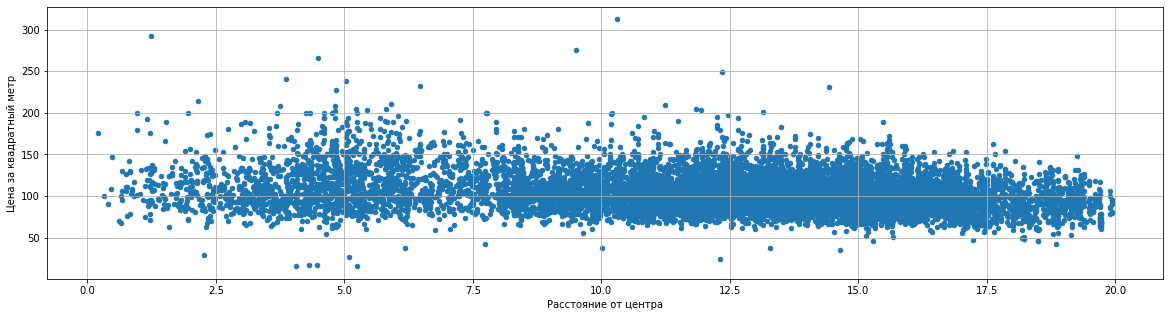

In [36]:
(filtered_df
     .query('cityCenters_nearest_km < 20')
     .plot(x='cityCenters_nearest_km', y='price_per_square_metr', grid=True, kind='scatter', figsize=(20, 5))
)
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена за квадратный метр')

Text(0, 0.5, 'Цена за квадратный метр')

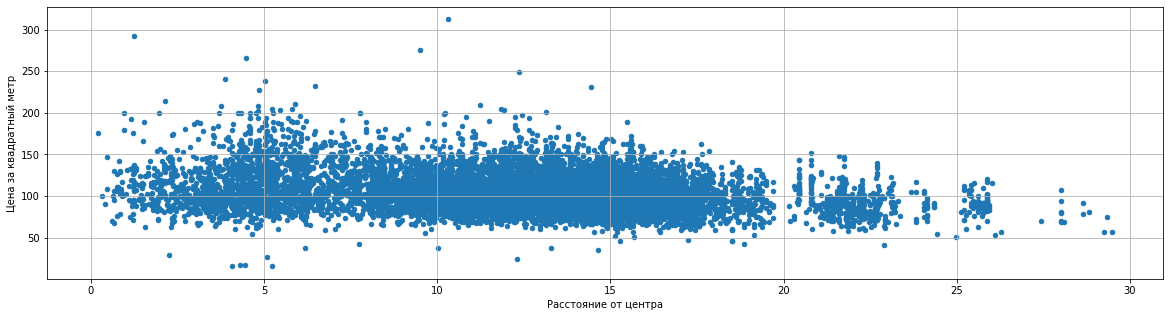

In [37]:
(filtered_df.query('locality_name == "Санкт-Петербург"')
      .sort_values('cityCenters_nearest_km', ascending=True)
      .plot(x='cityCenters_nearest_km', y='price_per_square_metr', grid=True, kind='scatter', figsize=(20, 5))
)
plt.xlabel('Расстояние от центра')
plt.ylabel('Цена за квадратный метр')

Вывод: можно предположить что центр это радиус в 5 км., т.к. стоимость 1 кв. м. самая большая, после плавно снижается. 

Рассмотрим квартиры в центре

In [38]:
# Срез до ценра
spb_centr = filtered_df.query('cityCenters_nearest_km < 5 and locality_name == "Санкт-Петербург"')
spb_centr.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_metr,weekday_exposition,month_exposition,year_exposition,living_area/total_area,kitchen_area/total_area,cityCenters_nearest_km
24,8,6500000,97,2015-10-31,2,2.65,3.00,46,первый,0,...,3.00,124.00,265.00,67.01,5,10,2015,0.47,0.20,2.34
61,18,7990000,74,2017-08-24,2,2.65,4.00,43,последний,0,...,0.00,nan,609.00,107.97,3,8,2017,0.58,0.27,4.29
136,16,6500000,51,2018-08-01,2,3.45,6.00,25,другой,0,...,1.00,812.00,163.00,127.45,2,8,2018,0.49,0.14,3.62
138,8,4800000,40,2017-11-18,2,2.65,3.00,29,другой,0,...,2.00,729.00,80.00,120.00,5,11,2017,0.72,0.15,2.91
154,1,8200000,80,2018-11-06,3,4.15,3.00,44,другой,0,...,1.00,838.00,38.00,102.50,1,11,2018,0.55,0.15,3.17


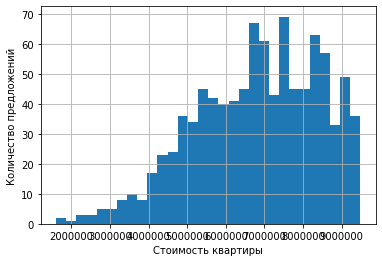

In [39]:
# Построим гистограмму по цене
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество предложений')
spb_centr['last_price'].hist(bins=30)

Больше всего предложений в диапозоне от 7 до 8 млн. руб.

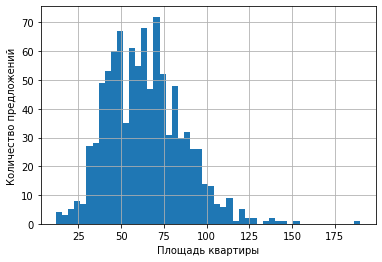

In [40]:
# Построим гистограмму по площади
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество предложений')
spb_centr['total_area'].hist(bins=50)

Больше всего предложений с площадью квартиры 60 кв. м.

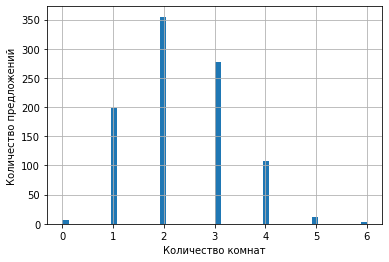

In [41]:
#Построим гистограмму по количесву комнат
plt.xlabel('Количество комнат')
plt.ylabel('Количество предложений')
spb_centr['rooms'].hist(bins=50)

В основном это 2-х ккв.

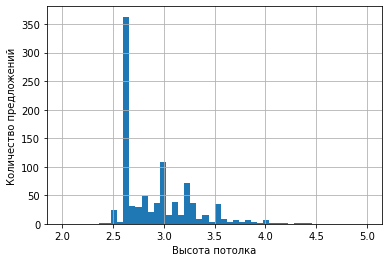

In [42]:
#Построим гистограмму по высоте потолков
plt.xlabel('Высота потолка')
plt.ylabel('Количество предложений')
spb_centr['ceiling_height'].hist(bins=50, range=(2, 5))

В основом высота около 2,6 м.

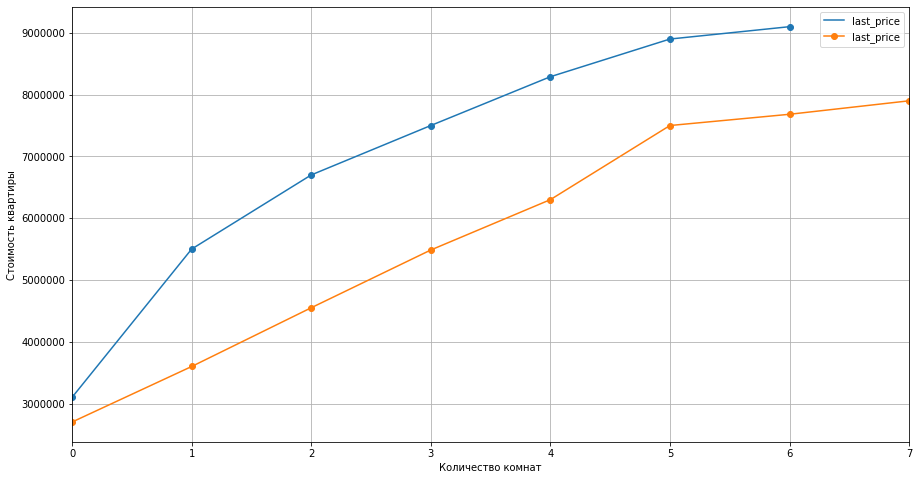

In [43]:
# Сравним 2 графика стоимости 
(spb_centr
     .sort_values(by='last_price',ascending=True)
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)

(filtered_df
     .groupby('rooms')['last_price'].median()
     .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),legend=True)
)
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.show()

В центре самые дорогие квартиры 4-5 комнатнные.

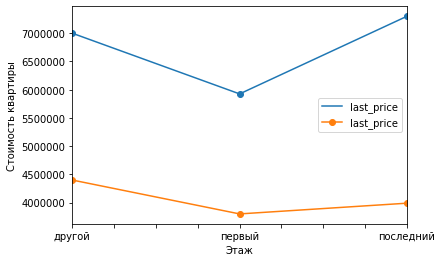

In [44]:
# Построим график по этажам
(spb_centr
    .groupby('floor')['last_price'].median()
    .plot(x='floor',y='last_price',style='o-',legend=True)
)


(filtered_df
    .groupby('floor')['last_price'].median()
    .plot(x='floor',y='last_price',style='o-',legend=True)
)
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры')
plt.show()

В центре покупают покупают квартиры на последнем этаже, можно предположить ввиду того что открывается хороший вид на город, но эти квартиры самые дорогие. Не в центре картина другая, спросом пользуются квартиры выше первого этажа.

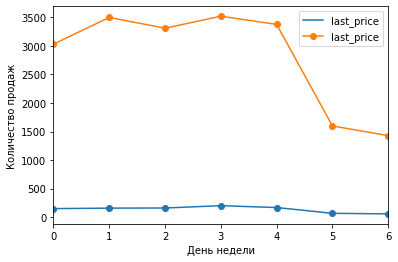

In [45]:
# Построим график продаж по дню недели
(spb_centr
     .groupby('weekday_exposition')['last_price'].count()
     .plot(x='weekday_exposition',y='last_price',style='o-',legend=True)
)

(filtered_df
     .groupby('weekday_exposition')['last_price'].count()
     .plot(x='weekday_exposition',y='last_price',style='o-',legend=True)
)
plt.xlabel('День недели')
plt.ylabel('Количество продаж')
plt.show()

Вывод: В центре спб одниково продаются в любой день недели, остальные квартиры продают в будние дни, на выходных сделок в два раза меньше.

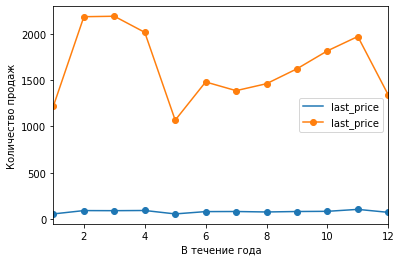

In [46]:
# Построим график продаж в течение года
(spb_centr
     .groupby('month_exposition')['last_price'].count()
     .plot(x='month_exposition',y='last_price',style='o-',legend=True)
)

(filtered_df
     .groupby('month_exposition')['last_price'].count()
     .plot(x='month_exposition',y='last_price',style='o-',legend=True)
)
plt.xlabel('В течение года')
plt.ylabel('Количество продаж')
plt.show()

Вывод: В течение года картина таже, в центре продают стабильно, останые продажи в основном перед Новым годом и после праздников. Самы большшой спад в мае месяца, но там майские праздники. 

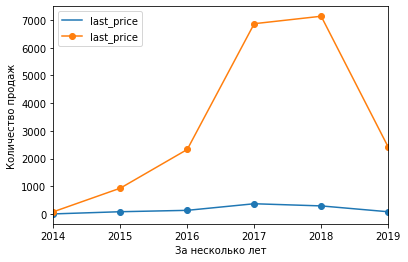

In [47]:
# Построим график продаж по годам
(spb_centr
     .groupby('year_exposition')['last_price'].count()
     .plot(x='year_exposition',y='last_price',style='o-',legend=True)
)

(filtered_df
     .groupby('year_exposition')['last_price'].count()
     .plot(x='year_exposition',y='last_price',style='o-',legend=True)
)
plt.xlabel('За несколько лет')
plt.ylabel('Количество продаж')
plt.show()

Вывод: в центре по годам тоже стабильная картина. По остальным продажам пик пришелся на 2017 и 2018 годы, видимо в эти года были факторы которые повлияли на спрос недвижимости.

## Общий вывод

Самое большое число обьявлений о продажи в Санкт-Петербурге. Самые дорогие 4-5 ком. квартиры на последнем этаже в центре Питера. В основном пользуются спросом 1-3 ком. квартиры выше первого этажа, в перделах 3-4 млн. рублей. Сделки в основном проходят в буднии дни, пик приходится на пред новогоднии месяци и февраль, март.